In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from IPython.display import display, Math, Latex


In [2]:
#data points
x=np.array([[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2]])
y=np.array([-1,-1,-1,+1,+1,+1])

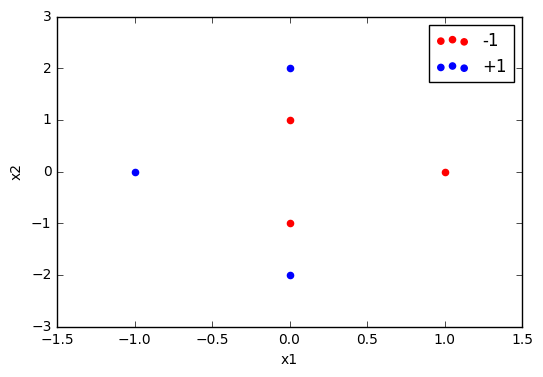

In [3]:
plt.scatter(x[0:3,0],x[0:3,1], color='Red',label='-1')
plt.scatter(x[3:6,0],x[3:6,1],color='Blue',label='+1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.show()


In [4]:
#constant of polynomial kernel
gamma=1
r=2
d=2

In [5]:
svc=SVC(kernel='poly',degree=d,gamma=gamma,coef0=r,verbose=True)
svc.fit(x,y)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=2,
  decision_function_shape=None, degree=2, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [6]:
svc.dual_coef_

array([[-0.45913763, -0.47406868,  0.53326357,  0.19623861,  0.20370413]])

In [7]:
svc.intercept_

array([-1.66639284])

In [8]:
svc.support_


array([1, 2, 3, 4, 5], dtype=int32)

In [9]:
def plot_decision_regions(X,y, classifier,test_idx=None, resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z= Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl,1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx],label=cl)

    if test_idx:
        X_test, y_test= X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1],c='',
                    alpha=1.0, linewidths=1, marker='o',
                    s=55, label='test set')

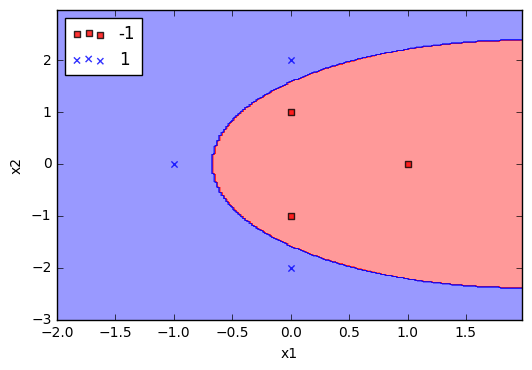

In [17]:
plot_decision_regions(x, y, classifier=svc)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

In [15]:
svc.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 2,
 'decision_function_shape': None,
 'degree': 2,
 'gamma': 1,
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': True}